<a href="https://colab.research.google.com/github/SitiFadhilahRahmi/Portfolio_SitiFadhilah/blob/main/ANALISIS_CUSTOMER_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/Telco-Customer-Churn.csv')
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG       F              0     Yes         No     1.0           No   
1  5575-GNVDE    Male              0      No         No    34.0          Yes   
2  3668-QPYBK    Male              0      No         No     2.0          Yes   
3  7795-CFOCW    Male              0      No         No    45.0           No   
4  9237-HQITU  Female              0      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
print(data.shape)

(7043, 21)


In [ ]:
print(data.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7040.000000     7043.000000
mean        0.162147    35.043892       64.761692
std         0.368612   115.282871       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000  7100.000000      118.750000


In [ ]:
print(data.isnull().sum())

customerID          0
gender              5
SeniorCitizen       0
Partner             0
Dependents          0
tenure              3
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(subset=['TotalCharges'], inplace=True)
data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [ ]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

In [ ]:
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])

In [ ]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: ylabel='tenure'>

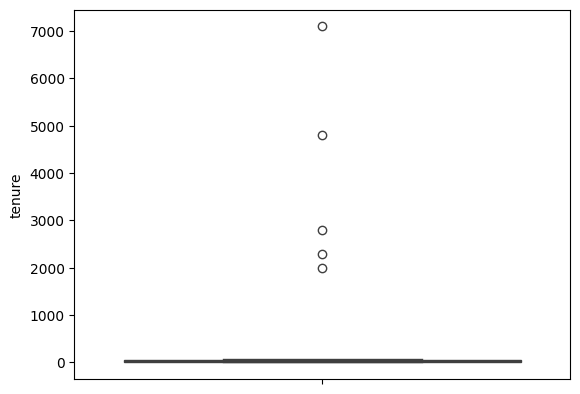

In [ ]:
sns.boxplot(data['tenure'])

<Axes: ylabel='MonthlyCharges'>

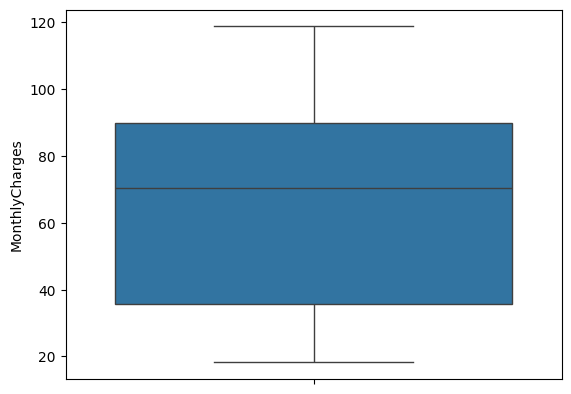

In [ ]:
sns.boxplot(data['MonthlyCharges'])

<Axes: ylabel='TotalCharges'>

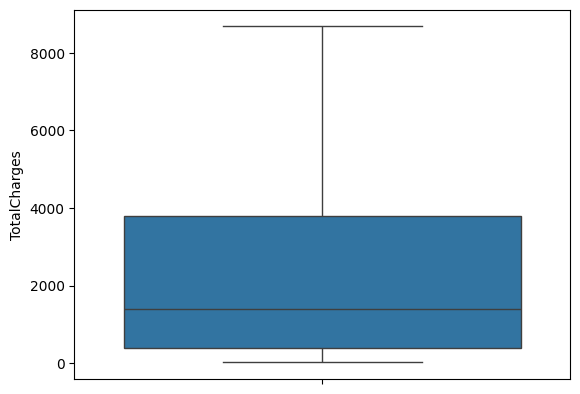

In [ ]:
sns.boxplot(data['TotalCharges'])

<Axes: ylabel='tenure'>

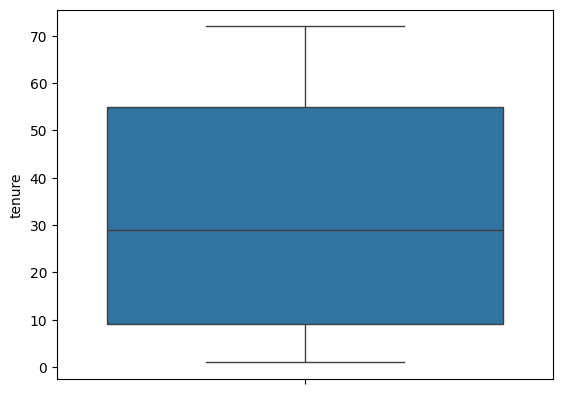

In [ ]:
Q1 = data['tenure'].quantile(0.25)  # Kuartil pertama
Q3 = data['tenure'].quantile(0.75)  # Kuartil ketiga
IQR = Q3 - Q1                       # Rentang interkuartil

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Trimming
data = data[(data['tenure'] >= lower_bound) & (data['tenure'] <= upper_bound)]

#Setelah di trimming
sns.boxplot(data['tenure'])

In [ ]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
print(data.describe(include='all'))  # Menampilkan statistik deskriptif untuk semua kolom

        customerID gender  SeniorCitizen Partner Dependents       tenure  \
count         7027   7027         7027.0    7027       7027  7027.000000   
unique        7027      4            2.0       2          2          NaN   
top     7590-VHVEG   Male            0.0      No         No          NaN   
freq             1   3548         5885.0    3638       4929          NaN   
mean           NaN    NaN            NaN     NaN        NaN    32.417248   
std            NaN    NaN            NaN     NaN        NaN    24.545237   
min            NaN    NaN            NaN     NaN        NaN     1.000000   
25%            NaN    NaN            NaN     NaN        NaN     9.000000   
50%            NaN    NaN            NaN     NaN        NaN    29.000000   
75%            NaN    NaN            NaN     NaN        NaN    55.000000   
max            NaN    NaN            NaN     NaN        NaN    72.000000   

       PhoneService MultipleLines InternetService OnlineSecurity  ...  \
count         

<Axes: >

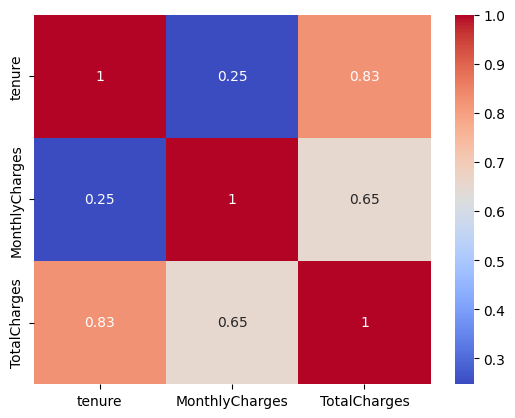

In [ ]:
correlation = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')